# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?
A tree is constructed of root nodes, internal nodes, and leaf nodes.A root node is the starting point of the entire tree structure. Internal nodes are the nodes that appear after splitting from the root node. Each Internal node will continue to spit based on a certain decision rule. Leaf nodes are the end points of the tree branches, is represents the final result determined after a series of splitting based of a series of decision rules. The tree is overall constructed by choosing the best split at each node using a criteria such as Gini Impurity for classification, or SSE for regression trees.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 
The trees split the feature space into different regions based on threshholds, without assuming any functional form or relationship between the input features and their corresponding output. This  way, the tree could capture data points that have no pattern in a dataset, compared to linear, polynomial, or logistic regressions that are all based on a functional assumption of the shape of the dataset when plotted out in a graph.

3. Why is the Gini a good loss function for categorical target variables? 
The Gini is a good loss function for categorical target variables because it measures how often a randomly chosen sample would be incorrectly classified if it were randomly labeled according to the distribution of labels in a node. It favors pure splits, meaning a case where one class dominates a node. The lower the Gini impurity the better the split, hence the algorithm will select the feature and split that results in the highest Gini Gain, or the lowest Gini Impurity.

4. Why do trees tend to overfit, and how can this tendency be constrained? 
Trees tend to overfit because they could keep splitting until each leaf only contains one data point, which means the tree would be perfectly fitting the training data. This reduces generalization to new and incoming data. To prevent this, one could set maximum depth of the tree, or requiring a minimum number of samples per leaf or per split. 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
False, with a lot of categorical variables, the tree will be forced to consider all possible binary splsits, this could potentially lead to overfitting. Trees also do well with continuous variables by finding optimal thresholds for splits

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
Binary splits are simpler to optimize, in which only one threshold or condition needs to be chosen. They also result in shallower trees that are easier to interpret. Multiple branches can cause combinatorial explosion and lead to risks in overfitting.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
If the tree is too deep, with too many layers and leaves. Very low training SSE and very high testing SSE. Trees could be overfitting. If the tree is very shallow, oversimplified, with large leaf nodes that contain a mix of prediction classses, the tree may be underfitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

In [36]:
# 1.
import pandas as pd 
import numpy as np
dfc = pd.read_csv('./data/cars_hw.csv')
print(dfc.shape)
print(dfc.info())
dfc.head(10)

(976, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


In [37]:
# 2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, 
# create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. 
# Our target variable will be `Price`. Make a train-test split of your data.
dfc_encoded = pd.get_dummies(dfc, columns=['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type'])
X = dfc_encoded.drop(columns=['Price', 'Unnamed: 0'])
y = dfc_encoded['Price']



Best minimum sample leaf is 6, with R^2 = 0.81


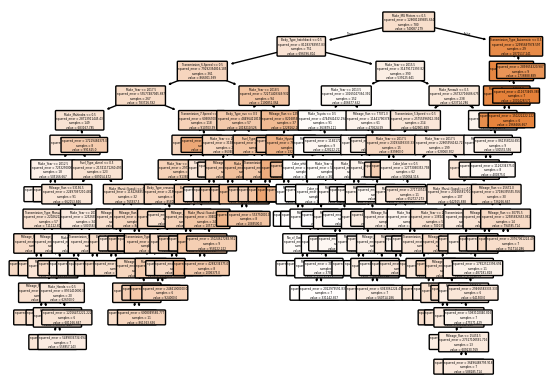

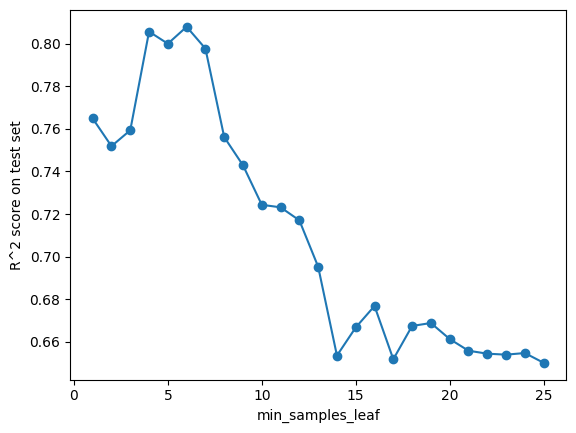

In [38]:
# 3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. 
# Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. 
# What choice achieves the highest $R^2$ on the test data?

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scores = []
min_leaves = []
best_score = -float('inf')
for leaf in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf = leaf, random_state = 11451)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    scores.append(r2)
    min_leaves.append(leaf)

    if r2 > best_score: 
        best_score = r2
        best_leaf = leaf
        best_model = model
print(f'Best minimum sample leaf is {best_leaf}, with R^2 = {best_score:.2f}')
plot_tree(best_model, feature_names = X.columns, filled=True, rounded=True, fontsize=2)
plt.show()

plt.plot(min_leaves, scores, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('R^2 score on test set')
plt.show()

optimal min_samples_leaf = 6
R^2 on test set = 0.8080
RMSE on test set = 176093.1466


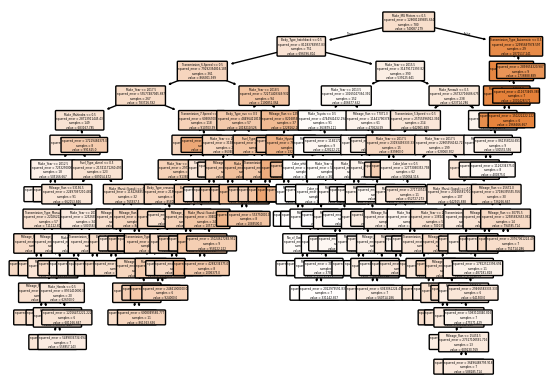

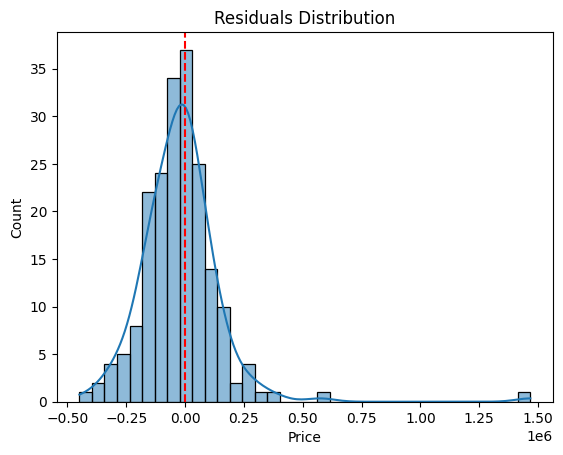

The density of residuals is not symmetric as it is not centered around 0


In [39]:
# 4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. 
# What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'optimal min_samples_leaf = {best_leaf}')
print(f'R^2 on test set = {r2:.4f}')
print(f'RMSE on test set = {rmse:.4f}')

plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, fontsize=2)
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.show()
print(f'The density of residuals is not symmetric as it is not centered around 0')

In [40]:
# 5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R^2 on X_test with linear regression is {r2:.2f}')
print(f'RMSE on X_test with linear regression is {RMSE:.2f}')

R^2 on X_test with linear regression is 0.78
RMSE on X_test with linear regression is 186819.61


It seems like Regression trees are slightly more accurate than linear regression for this dataset

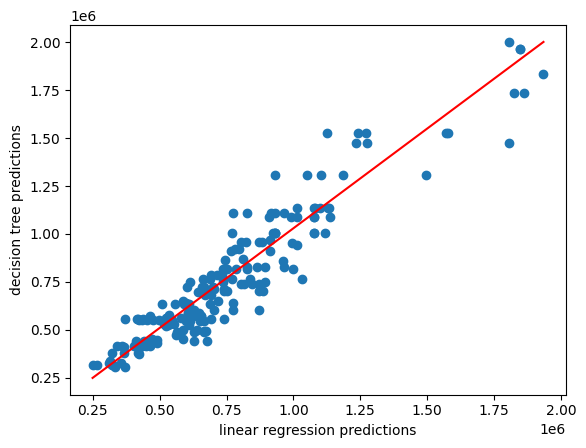

In [41]:
# 6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 
linear = LinearRegression()
linear.fit(X_train, y_train)
y_linear_pred = linear.predict(X_test)

tree = DecisionTreeRegressor(min_samples_leaf = best_leaf, random_state = 11451)
tree.fit(X_train, y_train)
y_tree_pred = tree.predict(X_test)

plt.scatter(y_linear_pred, y_tree_pred)
plt.plot([min(y_linear_pred), max(y_linear_pred)], [min(y_linear_pred), max(y_tree_pred)], color='red')
plt.xlabel('linear regression predictions')
plt.ylabel('decision tree predictions')
plt.show()


I see that the prediction results do show a linear trend but does not align closely with the perfect line of best fit. This shows that there are discrepancies in the predicted results between both models.

The regression tree seems to be predicting higher prices for the houses whereas the linear regression model seems to be more conservative on the prices

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [42]:
# 1. Load the `./data/corporate_ratings.csv` dataset. 
# How many observations and variables does it contain? Print out the first few rows of data.
dfr = pd.read_csv('./data/corporate_ratings.csv')
print(dfr.shape)
dfr.head(5)

(2029, 31)


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,0.165085,1.098948,5.535506,3.008012,0.750500,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,0.167953,1.207476,6.171983,2.156783,0.683222,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,0.133060,0.993501,4.991711,3.094575,0.755774,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,0.093279,1.229563,6.017408,2.630950,0.724590,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,0.186047,1.081710,5.437795,3.012780,0.750796,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


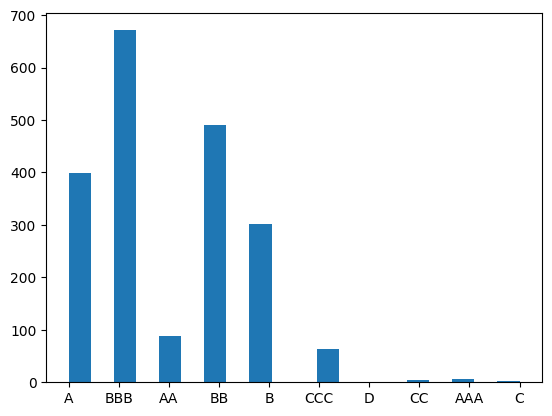

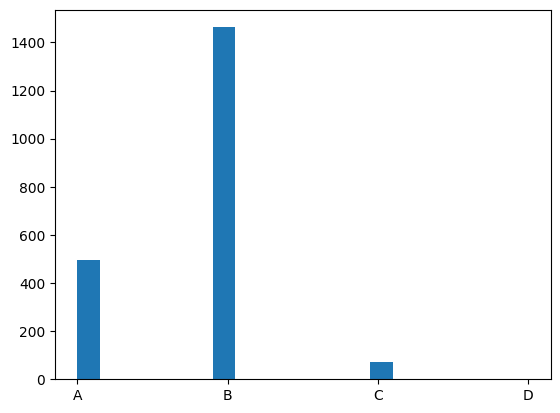

In [60]:
# 2.Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. 
# Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

plt.hist(dfr['Rating'], bins=20)
plt.show()
def transformation(rating):
    if rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif rating in ['BBB', 'BB', 'B']:
        return 'B'
    elif rating in ['CCC', 'CC', 'C']:
        return 'C'
    else:
        return rating
    
dfr['Ratings_New'] = dfr['Rating'].apply(transformation) 
plt.hist(dfr['Ratings_New'], bins=20)
plt.show()


In [61]:
# 3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. 
# To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. 
# Collect the relevant variables into a data matrix $X$. 
dfr_reduced = dfr.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name', 'Ratings_New'])
X = pd.get_dummies(dfr_reduced,columns=['Sector'], drop_first = True)
y = dfr['Ratings_New']

Accuracy: 0.76
              precision    recall  f1-score   support

           A       0.55      0.52      0.53        92
           B       0.82      0.87      0.84       297
           C       1.00      0.06      0.11        17

    accuracy                           0.76       406
   macro avg       0.79      0.48      0.50       406
weighted avg       0.76      0.76      0.74       406



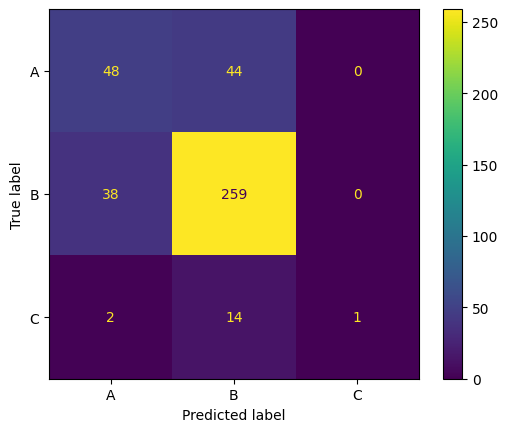

In [76]:
# 4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. 
# Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. 
# How well do you predict the different bond ratings?
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11451)
model_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=11451)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_tree, X_test, y_test)
plt.show()

Accuracy: 0.77
              precision    recall  f1-score   support

           A       0.60      0.54      0.57        92
           B       0.82      0.89      0.85       297
           C       0.00      0.00      0.00        17

    accuracy                           0.77       406
   macro avg       0.47      0.48      0.47       406
weighted avg       0.73      0.77      0.75       406



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


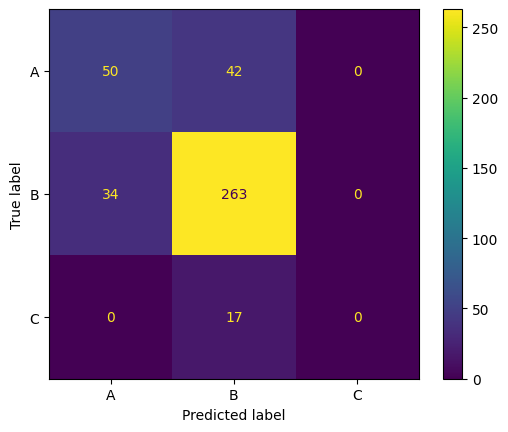

In [ ]:
# 5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? 
# How do you interpret this?

dfr_semi_reduced = dfr.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Ratings_New'])
X = pd.get_dummies(dfr_semi_reduced,columns=['Sector', 'Rating Agency Name'], drop_first = True)
y = dfr['Ratings_New']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=11451)
model_tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=11451)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_tree, X_test, y_test)
plt.show()

The results did change, in which the accuracy improved with the inclusion of a new variable. I'd attribute this to the fact that this particular variable - rating agency name - could be an inherent strong predictor for the classification of the ratings, hence the reason for the improvement in accuracy scores.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?